# Name: Vineet Poojary
# Roll No: 415
# SYBSC
# Time Series Case Study

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

## Forecasting model based on Moving Averages technique.

In [14]:
series = pd.read_csv(r"D:\Profile\Documents\Time Series Case Study Work\monthly-car-sales.csv", header = 0, index_col = 0, 
                    parse_dates = True).squeeze()
print(series.head())
print('-'*30)
series.tail()

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
Name: Sales, dtype: int64
------------------------------


Month
1968-08-01    16722
1968-09-01    14385
1968-10-01    21342
1968-11-01    17180
1968-12-01    14577
Name: Sales, dtype: int64

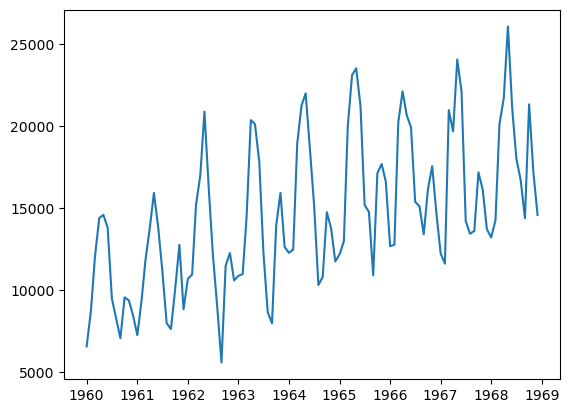

In [15]:
plt.plot(series)

In [16]:
dataframe = pd.DataFrame(series)
dataframe['MA'] = dataframe['Sales'].rolling(window = 3).mean()
print(dataframe.head())

            Sales            MA
Month                          
1960-01-01   6550           NaN
1960-02-01   8728           NaN
1960-03-01  12026   9101.333333
1960-04-01  14395  11716.333333
1960-05-01  14587  13669.333333


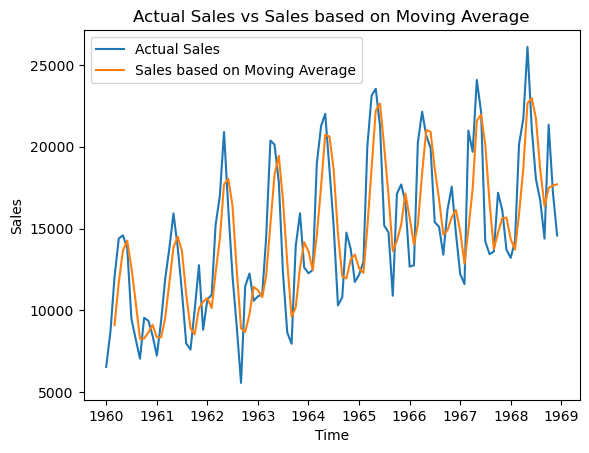

In [17]:
plt.plot(dataframe['Sales'], label = 'Actual Sales')
plt.plot(dataframe['MA'], label = 'Sales based on Moving Average')

plt.legend()
plt.title('Actual Sales vs Sales based on Moving Average')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

In [18]:
series = dataframe.squeeze()

In [19]:
n = 2
pred_vals = []
window = series.iloc[-3:].values

for i in range(n):
    next_pred = window.mean()
    pred_vals.append(next_pred)
    window = np.append(window[1:], next_pred)
    
print(f"Forecast for the next {n} months based on Moving Averages will be", pred_vals)

Forecast for the next 2 months based on Moving Averages will be [17652.88888888889, 16949.044444444447]


In [20]:
MA_values = series['MA'].dropna()
ACTUAL_values = series['Sales'][n:]

In [34]:
mape = mean_absolute_percentage_error(ACTUAL_values, MA_values) * 100
print(f'MAPE: {mape}')

MAPE: 16.046074390242676


## Forecasting model based on Linear Regression technique.

In [21]:
series = pd.read_csv(r"D:\Profile\Documents\Time Series Case Study Work\monthly-car-sales.csv", header = 0, index_col = 0, 
                    parse_dates = True).squeeze()
print(series.head())
print('-'*30)
series.tail()

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
Name: Sales, dtype: int64
------------------------------


Month
1968-08-01    16722
1968-09-01    14385
1968-10-01    21342
1968-11-01    17180
1968-12-01    14577
Name: Sales, dtype: int64

In [22]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis = 1)
dataframe.columns = ['t (x) Predictor', 't + 1 (y) Response']
print(dataframe.head())

   t (x) Predictor  t + 1 (y) Response
0              NaN                6550
1           6550.0                8728
2           8728.0               12026
3          12026.0               14395
4          14395.0               14587


In [23]:
dataframe.dropna(inplace = True)

In [24]:
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:, 0], train[:, 1]
test_X, test_y = test[:, 0], test[:, 1]

In [25]:
train_X = train_X.reshape(-1, 1)
test_X = test_X.reshape(-1, 1)


In [26]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [27]:
predictions = model.predict(test_X)

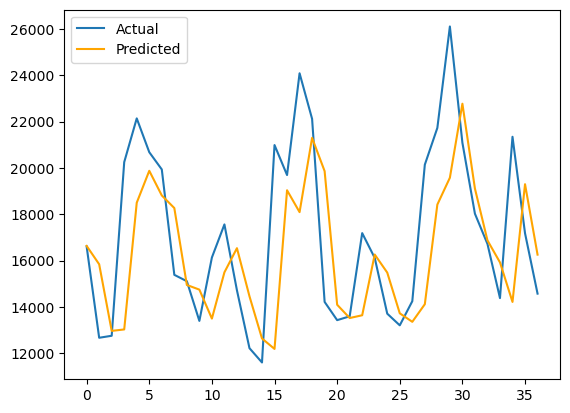

In [28]:
plt.plot(test_y, label='Actual')
plt.plot(predictions, label='Predicted', color='orange')
plt.legend()
plt.show()

In [58]:
mape = mean_absolute_percentage_error(test_y, predictions) * 100
print(f'MAPE: {mape}')

MAPE: 13.575918248282607


In [59]:
last_value = test_X[-1][0]
future_predictions = []
n_months = 2  

for i in range(n_months):
    next_pred = model.predict(np.array([[last_value]]))[0]
    future_predictions.append(next_pred)
    
    last_value = next_pred

print(f"Predictions for the next {n_months} months:", future_predictions)

Predictions for the next 2 months: [16257.351087973615, 15585.061149575758]


## Forecasting model based on ARIMA technique.

In [35]:
series = pd.read_csv(r"D:\Profile\Documents\Time Series Case Study Work\monthly-car-sales.csv", header = 0, index_col = 0, 
                    parse_dates = True).squeeze()
print(series.head())
print('-'*30)
series.tail()

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
Name: Sales, dtype: int64
------------------------------


Month
1968-08-01    16722
1968-09-01    14385
1968-10-01    21342
1968-11-01    17180
1968-12-01    14577
Name: Sales, dtype: int64

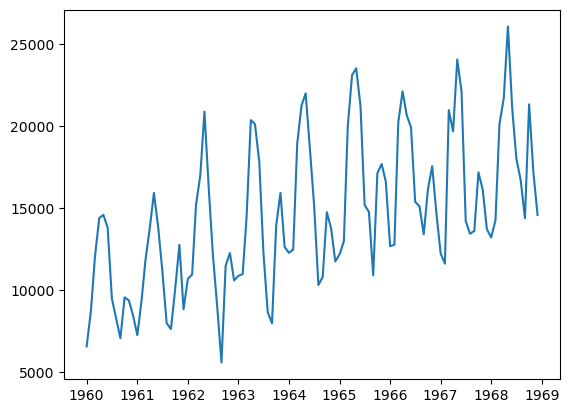

In [36]:
plt.plot(series)
plt.show();

In [38]:
result = adfuller(series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print("Non Stationary.")
else:
    print("Stationary.")

ADF Statistic: -1.2238127661752862
p-value: 0.6632691049832858
Non Stationary.


In [39]:
series_diff1 = series.diff().dropna()

In [40]:
result = adfuller(series_diff1)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print("Non Stationary.")
else:
    print("Stationary.")

ADF Statistic: -6.1997992308006875
p-value: 5.8447525992770696e-08
Stationary.


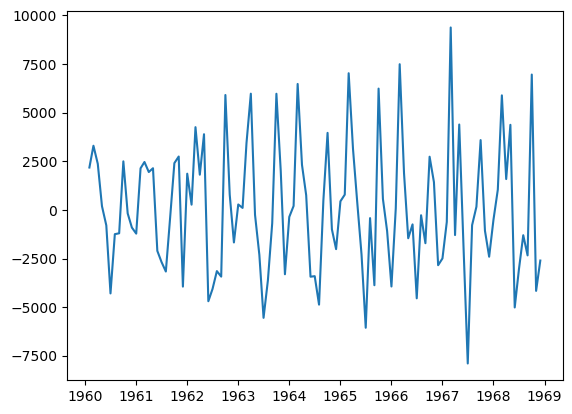

In [42]:
plt.plot(series_diff1)

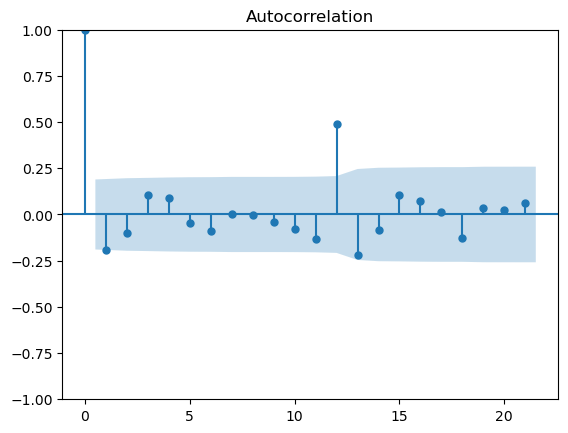

In [43]:
plot_acf(abs(series_diff1))
plt.show()

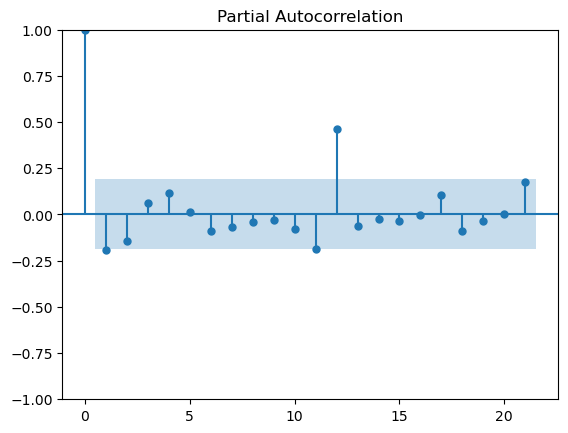

In [44]:
plot_pacf(abs(series_diff1))
plt.show()

In [45]:
model = ARIMA(series, order=(1, 1, 1))

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [46]:
model_fit = model.fit()

C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [47]:
train_size = int(len(series) * 0.66)
train, test = series[0:train_size], series[train_size:]
predictions = model_fit.forecast(steps=len(test))

In [49]:
mape = mean_absolute_percentage_error(test, predictions) * 100
print(f'MAPE: {mape}')

MAPE: 18.335242606457385


In [50]:
forecast_steps = 2 
forecast = model_fit.forecast(steps=forecast_steps)
forecast

1969-01-01    15313.428404
1969-02-01    15810.892406
Freq: MS, Name: predicted_mean, dtype: float64

## Inference: Among the three forecasting models, the Linear Regression model proved to be the most efficient with a MAPE of 13.575%, indicating that it provides the most accurate predictions for the dataset. The Moving Averages model had a moderate performance with a MAPE of 16.046%, while the ARIMA model, performed less effectively in this case with a MAPE of 18.335%. The results suggest that the Linear Regression model was able to capture the pattern in the data more accurately than the other models, making it the best choice for this particular forecasting task

# End